# Dataset referred
https://www.kaggle.com/datasets/kianindeed/imdb-movie-dataset-dec-2023/data
# Notebook on kaggle
https://www.kaggle.com/code/sanchitajindal/imdb-eda
# Table of Contents
- [Standardization](#Standardization)
- [Reading and Inspecting Data](#Reading-and-Inspecting-Data)
- [Data Cleaning](#Data-Cleaning)
- [Univariate Analysis](#Univariate-Analysis)
- [Bivariate Analysis](#Bivariate-Analysis)
- [Summary](#Summary)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movie-dataset-dec-2023/imdb_movie_data_2023.csv


In [2]:
df = pd.read_csv("/kaggle/input/imdb-movie-dataset-dec-2023/imdb_movie_data_2023.csv")
df.head()

,Unnamed: 0,Moive Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


## Standardization

Removing **"Unnamed"** column.

In [3]:
file_path = '/kaggle/input/imdb-movie-dataset-dec-2023/imdb_movie_data_2023.csv'
columns_to_exclude = ['Unnamed: 0']
all_columns = pd.read_csv(file_path, nrows=0).columns.tolist()
columns_to_include = [col for col in all_columns if col not in columns_to_exclude]
df = pd.read_csv(file_path, usecols=columns_to_include)
df.head()


,Moive Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


Changing the name of first column from **"Moive Name"** to **"Movie Name"**

In [4]:
df.rename(columns={"Moive Name": "Movie Name"},inplace = True)
df.head()

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


# Reading and Inspecting Data

The dataset consists of the following columns:
- **Movie Name**: Contains names of the top IMDB movies updated till 15-Dec 2023.
- **Rating**: Contains the IMDB rating.
- **Votes**: Contains the number of votes the movie got.
- **Meta Score**: Gives the meta score of each movie.
- **Genre**: Categorizes various movies based on their genre.
- **PG Rating**: Gives the PG rating of the movies.
- **Year**: Gives the year in which each movie was released.
- **Duration**: Gives the duration of the movie.
- **Cast**: Contains the cast of each movie.
- **Director**: Contains the name of the director of each movie.

In [5]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 1950 rows and 10 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie Name  1950 non-null   object 
 1   Rating      1944 non-null   float64
 2   Votes       1944 non-null   float64
 3   Meta Score  1833 non-null   float64
 4   Genre       1833 non-null   object 
 5   PG Rating   1874 non-null   object 
 6   Year        1950 non-null   int64  
 7   Duration    1948 non-null   object 
 8   Cast        1833 non-null   object 
 9   Director    1833 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 152.5+ KB


In [7]:
df["Year"].head(20)

0     2023
1     2023
2     2023
3     2023
4     2023
5     2023
6     2023
7     2023
8     2003
9     2023
10    2023
11    2023
12    1989
13    2023
14    2023
15    2023
16    2023
17    2023
18    2003
19    2000
Name: Year, dtype: int64

In [8]:
df['Duration']

0       2h 18m
1       1h 56m
2       2h 21m
3       3h 26m
4       1h 57m
         ...  
1945    1h 52m
1946    1h 36m
1947    1h 44m
1948    1h 47m
1949    1h 55m
Name: Duration, Length: 1950, dtype: object

In [9]:
df['Rating']

0       6.5
1       7.4
2       8.5
3       7.8
4       7.0
       ... 
1945    7.1
1946    7.6
1947    6.5
1948    6.4
1949    7.1
Name: Rating, Length: 1950, dtype: float64

# Data Cleaning

## Handling missing values

In [10]:
df.isnull().mean()*100

Movie Name    0.000000
Rating        0.307692
Votes         0.307692
Meta Score    6.000000
Genre         6.000000
PG Rating     3.897436
Year          0.000000
Duration      0.102564
Cast          6.000000
Director      6.000000
dtype: float64

### Handling missing values in "Meta Score" column

In [11]:
df[df["Meta Score"].isnull()]

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
39,The Shift,6.4,2400.0,NaN,NaN,PG-13,2023,1h 55m,NaN,NaN
41,Christmas on Cherry Lane,6.2,689.0,NaN,NaN,TV-G,2023,1h 30m,NaN,NaN
56,Lady Ballers,6.2,9200.0,NaN,NaN,TV-14,2023,1h 52m,NaN,NaN
66,Miracle on 34th Street,6.6,42000.0,NaN,NaN,PG,1994,1h 54m,NaN,NaN
77,Migration,7.1,848.0,NaN,NaN,PG,2023,1h 32m,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1916,The Titfield Thunderbolt,7.0,3200.0,NaN,NaN,NaN,1953,1h 24m,NaN,NaN
1928,Boudica: Queen of War,4.4,1600.0,NaN,NaN,R,2023,1h 41m,NaN,NaN
1930,Appointment with Death,6.1,5800.0,NaN,NaN,PG,1988,1h 42m,NaN,NaN
1934,The Night Walker,6.3,2300.0,NaN,NaN,Passed,1964,1h 26m,NaN,NaN


In [12]:
# -1 = Not known in the Meta Score column
df["Meta Score"]=df["Meta Score"].fillna(-1)
df["Meta Score"].isnull().sum()

0

### Handling missing values in "Genre" column

In [13]:
df[df["Genre"].isnull()]

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
39,The Shift,6.4,2400.0,-1.0,NaN,PG-13,2023,1h 55m,NaN,NaN
41,Christmas on Cherry Lane,6.2,689.0,-1.0,NaN,TV-G,2023,1h 30m,NaN,NaN
56,Lady Ballers,6.2,9200.0,-1.0,NaN,TV-14,2023,1h 52m,NaN,NaN
66,Miracle on 34th Street,6.6,42000.0,-1.0,NaN,PG,1994,1h 54m,NaN,NaN
77,Migration,7.1,848.0,-1.0,NaN,PG,2023,1h 32m,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1916,The Titfield Thunderbolt,7.0,3200.0,-1.0,NaN,NaN,1953,1h 24m,NaN,NaN
1928,Boudica: Queen of War,4.4,1600.0,-1.0,NaN,R,2023,1h 41m,NaN,NaN
1930,Appointment with Death,6.1,5800.0,-1.0,NaN,PG,1988,1h 42m,NaN,NaN
1934,The Night Walker,6.3,2300.0,-1.0,NaN,Passed,1964,1h 26m,NaN,NaN


In [14]:
df["Genre"]=df["Genre"].fillna("Unknown")
df["Genre"].isnull().sum()

0

### Handling missing values in "PG Rating" column

In [15]:
df[df["PG Rating"].isnull()]

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
24,Fast Charlie,5.9,3700.0,70.0,"Action, Crime, Drama",NaN,2023,1h 30m,"Pierce Brosnan, Morena Baccarin, James Caan, G...",Phillip Noyce
42,White Christmas,7.6,49000.0,56.0,"Comedy, Musical, Romance",NaN,1954,2h,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",Michael Curtiz
81,Silver and the Book of Dreams,5.5,1200.0,-1.0,Unknown,NaN,2023,1h 32m,NaN,NaN
82,Cat Person,6.1,1800.0,48.0,"Drama, Thriller",NaN,2023,1h 58m,"Emilia Jones, Nicholas Braun, Geraldine Viswan...",Susanna Fogel
98,Miracle on 34th Street,7.9,53000.0,88.0,"Comedy, Drama, Family",NaN,1947,1h 36m,"Edmund Gwenn, Maureen O'Hara, John Payne, Gene...",George Seaton
...,...,...,...,...,...,...,...,...,...,...
1818,Last Train to Christmas,6.0,3200.0,-1.0,Unknown,NaN,2021,1h 50m,NaN,NaN
1827,Picture of Beauty,3.4,1600.0,-1.0,Unknown,NaN,2017,1h 10m,NaN,NaN
1855,The Voyeur,5.5,3800.0,-1.0,Unknown,NaN,1994,1h 38m,NaN,NaN
1875,The Christmas Classic,5.2,128.0,-1.0,Unknown,NaN,2023,1h 26m,NaN,NaN


In [16]:
df["PG Rating"]=df["PG Rating"].fillna(-1)
df["PG Rating"].isnull().sum()

0

### Handling missing values in "Cast" column

In [17]:
df[df["Cast"].isnull()]

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
39,The Shift,6.4,2400.0,-1.0,Unknown,PG-13,2023,1h 55m,NaN,NaN
41,Christmas on Cherry Lane,6.2,689.0,-1.0,Unknown,TV-G,2023,1h 30m,NaN,NaN
56,Lady Ballers,6.2,9200.0,-1.0,Unknown,TV-14,2023,1h 52m,NaN,NaN
66,Miracle on 34th Street,6.6,42000.0,-1.0,Unknown,PG,1994,1h 54m,NaN,NaN
77,Migration,7.1,848.0,-1.0,Unknown,PG,2023,1h 32m,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1916,The Titfield Thunderbolt,7.0,3200.0,-1.0,Unknown,-1,1953,1h 24m,NaN,NaN
1928,Boudica: Queen of War,4.4,1600.0,-1.0,Unknown,R,2023,1h 41m,NaN,NaN
1930,Appointment with Death,6.1,5800.0,-1.0,Unknown,PG,1988,1h 42m,NaN,NaN
1934,The Night Walker,6.3,2300.0,-1.0,Unknown,Passed,1964,1h 26m,NaN,NaN


In [18]:
df["Cast"]=df["Cast"].fillna("Unknown")
df["Cast"].isnull().sum()

0

### Handling missing values in "Director" column

In [19]:
df[df["Director"].isnull()]

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
39,The Shift,6.4,2400.0,-1.0,Unknown,PG-13,2023,1h 55m,Unknown,NaN
41,Christmas on Cherry Lane,6.2,689.0,-1.0,Unknown,TV-G,2023,1h 30m,Unknown,NaN
56,Lady Ballers,6.2,9200.0,-1.0,Unknown,TV-14,2023,1h 52m,Unknown,NaN
66,Miracle on 34th Street,6.6,42000.0,-1.0,Unknown,PG,1994,1h 54m,Unknown,NaN
77,Migration,7.1,848.0,-1.0,Unknown,PG,2023,1h 32m,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...
1916,The Titfield Thunderbolt,7.0,3200.0,-1.0,Unknown,-1,1953,1h 24m,Unknown,NaN
1928,Boudica: Queen of War,4.4,1600.0,-1.0,Unknown,R,2023,1h 41m,Unknown,NaN
1930,Appointment with Death,6.1,5800.0,-1.0,Unknown,PG,1988,1h 42m,Unknown,NaN
1934,The Night Walker,6.3,2300.0,-1.0,Unknown,Passed,1964,1h 26m,Unknown,NaN


In [20]:
df["Director"]=df["Director"].fillna("Unknown")
df["Director"].isnull().sum()

0

- **"rating,votes,duration" columns have less amount of NaN values,we can directly drop that.**

In [21]:
df.dropna(inplace=True)
df.isnull().mean()*100

Movie Name    0.0
Rating        0.0
Votes         0.0
Meta Score    0.0
Genre         0.0
PG Rating     0.0
Year          0.0
Duration      0.0
Cast          0.0
Director      0.0
dtype: float64

# Univariate Analysis

## Analysing "PG Rating" column

In [22]:
df["PG Rating"].nunique()

19

In [23]:
df["PG Rating"].value_counts(normalize=True)[:5]

PG Rating
R        0.434089
PG-13    0.314624
PG       0.143151
-1       0.038105
G        0.024202
Name: proportion, dtype: float64

<Axes: xlabel='PG Rating'>

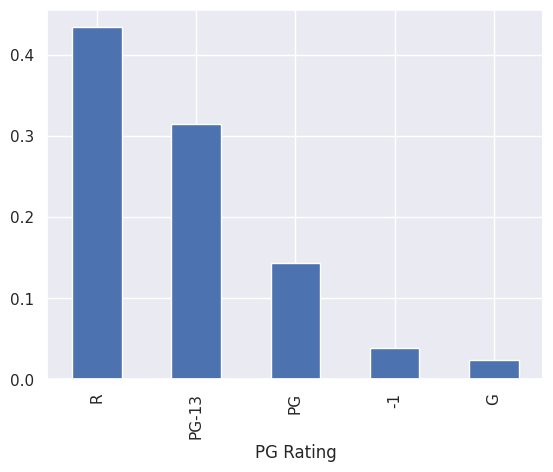

In [24]:
df["PG Rating"].value_counts(normalize=True)[:5].plot.bar()

- **Inference**
- Around 43% of the movies in the given dataset are R rated, 31% have a PG rating og PG-13 and 14% are PG rated.

## Analysing "Director" column

In [25]:
df["Director"].nunique()

958

In [26]:
df["Director"].value_counts()

Director
Unknown                            115
Steven Spielberg                    25
Ridley Scott                        18
Martin Scorsese                     15
Tim Burton                          12
                                  ... 
Ron ClementsJohn MuskerDon Hall      1
Robert De Niro                       1
Charlie Day                          1
Sam H. FreemanNg Choon Ping          1
Adam Brooks                          1
Name: count, Length: 958, dtype: int64

- **Inference**
- Director, Steven Spielberg has released the maximum number of movies in the given dataset.

## Analysing "Year" feature

In [27]:
df["Year"].nunique()

83

In [28]:
df["Year"].value_counts(normalize=True)[:3]

Year
2023    0.126674
2022    0.059217
2019    0.039135
Name: proportion, dtype: float64

<Axes: xlabel='Year'>

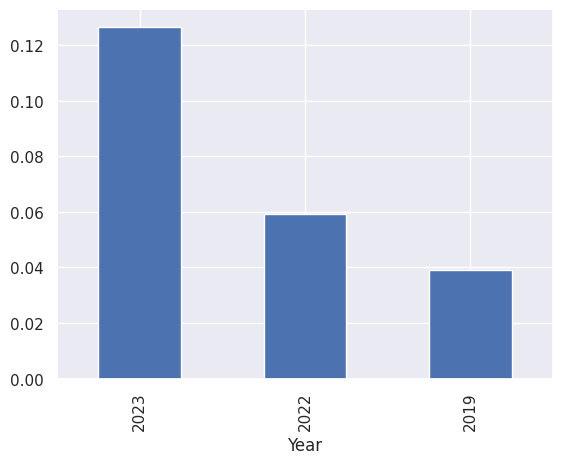

In [29]:
df["Year"].value_counts(normalize=True)[:3].plot.bar()

- **Inference**
- Around 14% of the movies in the dataset were released in the year 2023.

### Another method for analysing the "Year" column

<Axes: xlabel='Year', ylabel='Density'>

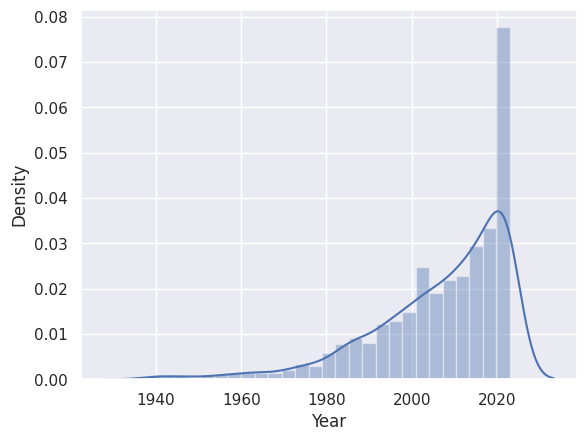

In [30]:
sns.distplot(df["Year"])

<Axes: xlabel='Year', ylabel='count'>

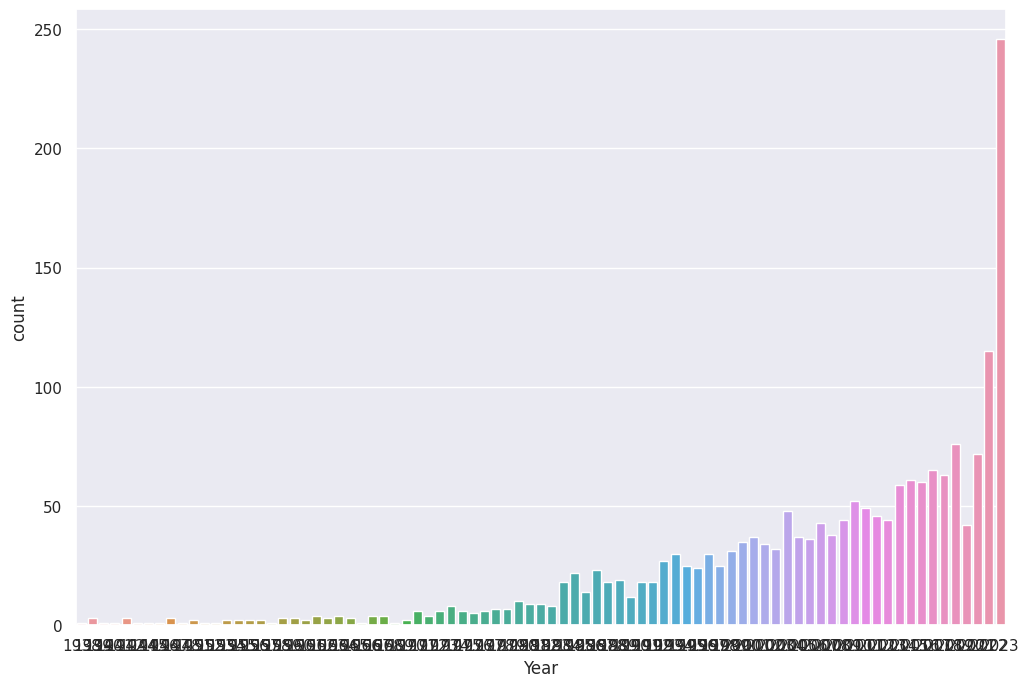

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['Year'])

- **Inference**
- Majority of the shows were released in the year 2023.

## Analysing "Genre" column

In [32]:
genre_list=df["Genre"].str.split(",")

In [33]:
df["Genre_1"]=genre_list.str.get(0)
df["Genre_2"]=genre_list.str.get(1)
df["Genre_3"]=genre_list.str.get(2)

In [34]:
df.drop("Genre",axis=1,inplace=True)

In [35]:
df.head()

,Movie Name,Rating,Votes,Meta Score,PG Rating,Year,Duration,Cast,Director,Genre_1,Genre_2,Genre_3
0,Leave the World Behind,6.5,90000.0,67.0,R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail,Drama,Mystery,Thriller
1,Wonka,7.4,24000.0,66.0,PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King,Adventure,Comedy,Family
2,Poor Things,8.5,6700.0,86.0,R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos,Comedy,Drama,Romance
3,Killers of the Flower Moon,7.8,128000.0,89.0,R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese,Crime,Drama,History
4,May December,7.0,21000.0,85.0,R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes,Comedy,Drama,NaN


<Axes: xlabel='Genre_1'>

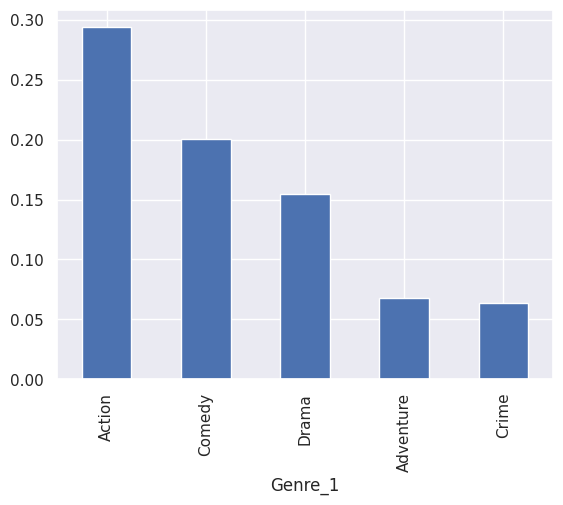

In [36]:
df['Genre_1'].value_counts(normalize=True)[:5].plot.bar()

- **Inference**
- The dataset has highest movies of Action, followed by Comedy.

In [37]:
df

,Movie Name,Rating,Votes,Meta Score,PG Rating,Year,Duration,Cast,Director,Genre_1,Genre_2,Genre_3
0,Leave the World Behind,6.5,90000.0,67.0,R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail,Drama,Mystery,Thriller
1,Wonka,7.4,24000.0,66.0,PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King,Adventure,Comedy,Family
2,Poor Things,8.5,6700.0,86.0,R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos,Comedy,Drama,Romance
3,Killers of the Flower Moon,7.8,128000.0,89.0,R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese,Crime,Drama,History
4,May December,7.0,21000.0,85.0,R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes,Comedy,Drama,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1945,"Definitely, Maybe",7.1,172000.0,59.0,PG-13,2008,1h 52m,"Ryan Reynolds, Rachel Weisz, Abigail Breslin, ...",Adam Brooks,Comedy,Drama,Romance
1946,The Fly,7.6,198000.0,79.0,R,1986,1h 36m,"Jeff Goldblum, Geena Davis, John Getz, Joy Bou...",David Cronenberg,Drama,Horror,Sci-Fi
1947,The Mighty Ducks,6.5,71000.0,46.0,PG,1992,1h 44m,"Emilio Estevez, Joss Ackland, Lane Smith, Heid...",Stephen Herek,Comedy,Drama,Family
1948,Little Giants,6.4,30000.0,-1.0,PG,1994,1h 47m,Unknown,Unknown,Unknown,NaN,NaN


# Bivariate Analysis

In [38]:
temp_df = df[df['Year'].isin(df['Year'].value_counts()[:5].index)]

<Axes: xlabel='Year', ylabel='count'>

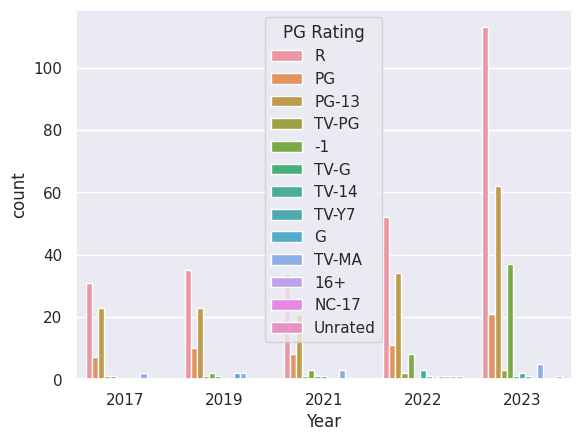

In [39]:
sns.countplot(data=temp_df,x='Year',hue='PG Rating')

- **Inference**
- Every year, majority of the movies released are R rated, followed by PG rated movies.

<Axes: xlabel='Year', ylabel='count'>

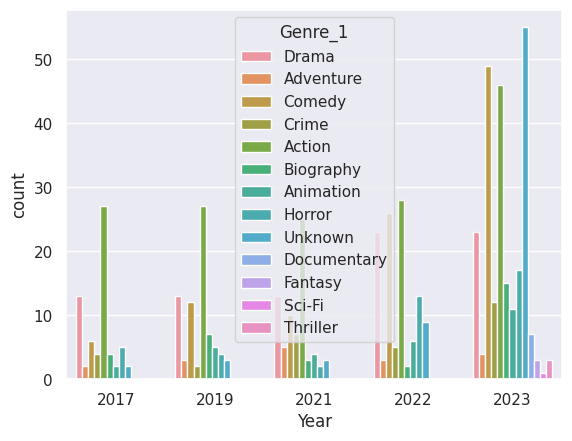

In [40]:
sns.countplot(data=temp_df,x='Year',hue='Genre_1')

# Summary
- Around 43% of the movies in the given dataset are R rated, 31% have a PG rating og PG-13 and 14% are PG rated.
- Director, Steven Spielberg has released the maximum number of movies in the given dataset.
- Around 14% of the movies in the dataset were released in the year 2023.
- Majority of the shows were released in the year 2023.
- The dataset has highest movies of Action, followed by Comedy.
- Every year, majority of the movies released are R rated, followed by PG rated movies.